In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/projetyasmine/folds.csv

/kaggle/input/projetyasmine/Train.csv

/kaggle/input/projetyasmine/Test.csv

/kaggle/input/projetyasmine/Images/id_dkbp68fw0g.jpg

/kaggle/input/projetyasmine/Images/id_cz3jnoimvm.jpg

/kaggle/input/projetyasmine/Images/id_rvu3jjuh34_rgn.jpg

/kaggle/input/projetyasmine/Images/id_akzsic5cnz_rgn.jpg

/kaggle/input/projetyasmine/Images/id_004wknd7qd.jpg

/kaggle/input/projetyasmine/Images/id_nqmwafm3jo.jpg

/kaggle/input/projetyasmine/Images/id_wwo1nsomhj_rgn.jpg

/kaggle/input/projetyasmine/Images/id_z0hq8jpog2.jpg

/kaggle/input/projetyasmine/Images/id_d9lk3ojg11_rgn.jpg

/kaggle/input/projetyasmine/Images/id_uj6bcc6774_rgn.jpg

/kaggle/input/projetyasmine/Images/id_falxfhtpdw_rgn.jpg

/kaggle/input/projetyasmine/Images/id_nvepupqkuu_rgn.jpg

/kaggle/input/projetyasmine/Images/id_mjhv8d9dvy.jpg

/kaggle/input/projetyasmine/Images/id_aw9y79nutx_rgn.jpg

/kaggle/input/projetyasmine/Images/id_lfz4f0u3hl_rgn.jpg

/kaggle/input/projetyasmine/Images/id_

In [1]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=e90f013141f49694b3b27bca3654568dd5fb0f1e4727055bffaf1e00d7ed5165
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [25]:
df = pd.read_csv(r"D:\DATA_SCIENCE\MASTER_2\ProjectData354\Train.csv")
df.head()


,Image_id,Label
0,id_004wknd7qd.jpg,blast
1,id_004wknd7qd_rgn.jpg,blast
2,id_005sitfgr2.jpg,brown
3,id_005sitfgr2_rgn.jpg,brown
4,id_00stp9t6m6.jpg,blast


In [26]:
#Suppression des image infrarouge dans mon ensemble d'entrainement
df.drop(df[df.index %2 != 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670 entries, 0 to 5338
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image_id  2670 non-null   object
 1   Label     2670 non-null   object
dtypes: object(2)
memory usage: 41.8+ KB


In [27]:
df.isna().sum()

Image_id    0
Label       0
dtype: int64

In [28]:
modalite_counts = df['Label'].value_counts()
modalite_counts

Label
blast      1494
brown       766
healthy     410
Name: count, dtype: int64

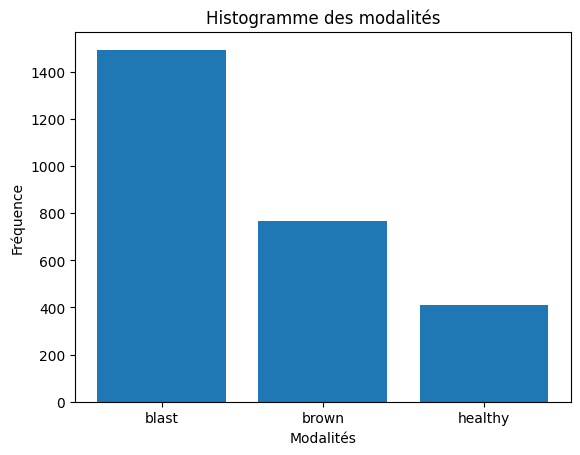

In [29]:
plt.bar(modalite_counts.index, modalite_counts.values)
plt.xlabel('Modalités')
plt.ylabel('Fréquence')
plt.title('Histogramme des modalités')
plt.show()

In [30]:
#Ecodage des modalités
encoder = LabelEncoder()
df['score'] = encoder.fit_transform(df['Label'])
df = df.reset_index()
df = df[['Image_id', 'score']].reset_index(drop = True)
df.head()

,Image_id,score
0,id_004wknd7qd.jpg,0
1,id_005sitfgr2.jpg,1
2,id_00stp9t6m6.jpg,0
3,id_012zxewnhx.jpg,0
4,id_0186qwq2at.jpg,2


In [31]:
#Attribution de blocs à nos images pour la validatoon croisée
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for n, (_, valid_index) in enumerate(kf.split(df, df['score'])):
    df.loc[valid_index, 'fold'] = int(n)

df['fold'] = df['fold'].astype(int)
df

,Image_id,score,fold
0,id_004wknd7qd.jpg,0,3
1,id_005sitfgr2.jpg,1,4
2,id_00stp9t6m6.jpg,0,3
3,id_012zxewnhx.jpg,0,4
4,id_0186qwq2at.jpg,2,3
...,...,...,...
2665,id_zydzdp046u.jpg,2,2
2666,id_zyoowbqcm3.jpg,2,4
2667,id_zz6gzk7p97.jpg,1,0
2668,id_zz8ca2p67e.jpg,0,3


In [32]:
df[df['fold'] == 4][df[df['fold'] == 4]['score'] == 0]

,Image_id,score,fold
3,id_012zxewnhx.jpg,0,4
25,id_0d6zji749f.jpg,0,4
33,id_0hyxh5b0u4.jpg,0,4
52,id_0qqjl92ak2.jpg,0,4
53,id_0qvf8osgu2.jpg,0,4
...,...,...,...
2644,id_zow3gghj0l.jpg,0,4
2649,id_zrojwzhjp4.jpg,0,4
2651,id_zt1a8nuesi.jpg,0,4
2658,id_zw3dkayu0b.jpg,0,4


In [33]:
#Récupération du fichier avec les blocs définis
df.to_csv(r'folds.csv')

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import  Image
import torch
from torch import nn, optim
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
from torchvision import transforms, models


In [13]:
def seet_everyting(seed = 42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True 
seet_everyting()

In [14]:
class Dataset(Dataset):
    def __init__(self, image, file, mode, fold, h, w, transform = None):
        self.image     = image
        self.w         = w 
        self.h         = h
        self.transform = transform
        if mode == 'train': self.file = pd.read_csv(file)[pd.read_csv(file)['fold'] != fold].reset_index(drop = True)
        else              : self.file = pd.read_csv(file)[pd.read_csv(file)['fold'] == fold].reset_index(drop = True)
    
    def __len__(self):
        return self.file.shape[0]
    
    def __getitem__(self, index):
        img_path  = os.path.join(self.image, self.file['Image_id'][index])

        image     = np.array(Image.open(img_path).convert('RGB'))

        if self.transform is not None:
            augmentations = self.transform(image = image)
            image = augmentations['image']

        y = self.file['score'][index]
        if y == 0 : y = [1,0,0]
        if y == 1 : y = [0,1,0]
        else      : y = [0,0,1]

        return image, torch.tensor(y)

In [15]:
LR = 3e-4
BS = 32
NE = 6
H = 224
W = 192

IMG = r"/kaggle/input/projetyasmine/Images"
FILE = r"/kaggle/input/projetyasmine/folds.csv"


def get_loaders(image, file, fold, h, w, bs, train_transform, val_transform, pin_memory = True):
    train_ds = Dataset(image = image, file = file, mode = 'train', fold = fold, h = h, w =w, transform = train_transform)
    train_loader = DataLoader(train_ds, batch_size=bs, pin_memory = pin_memory, shuffle=True)

    val_ds = Dataset(image = image, file = file, mode = 'val', fold = fold, h = h, w =w, transform = val_transform)
    val_loader = DataLoader(val_ds, batch_size=bs, pin_memory = pin_memory, shuffle=True)

    return train_loader, val_loader
normalize = A.Normalize(
    mean = [0.485, 0.456, 0.406],
    std  = [0.229, 0.224, 0.255],
    max_pixel_value = 255.0
)

train_transform = A.Compose(
    [
        A.Resize(width= W, height= H), 
        A.HorizontalFlip(p = 0.6),
        A.VerticalFlip(p = 0.4),
        A.Rotate(limit=40),
        normalize,
        ToTensorV2()
    ]
)

val_transform = A.Compose(
    [
        A.Resize(width= W, height= H), 
        normalize,
        ToTensorV2()
    ]
)

In [16]:
# Définir le modèle ResNet-18
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.resnet18 = models.resnet18(pretrained=True)
        in_features = self.resnet18.fc.in_features
        self.resnet18.fc = nn.Linear(in_features, 3)

    def forward(self, x):
        return self.resnet18(x)


In [20]:
def check_acc(loader, model, loss_fn):
    correct_predictions = 0
    total_samples = 0
    total_loss = 0

    model.eval()

    with torch.no_grad():
        for x, y in tqdm(loader):
            x = x.to(device).to(torch.float32)
            y = y.to(device).to(torch.float32)  
            
            scores       = model(x)
            total_loss   = loss_fn(scores, y)
        average_loss = total_loss / len(loader)
        print("Average Loss:", average_loss)
    model.train()
    return average_loss


def save_checkpoint(state, filename):
    print('--> saving checkpoint')
    torch.save(state, filename)


In [21]:
def train_fn(loader, mode, optimizer, loss_fn, scaler):
        for x, y in tqdm(loader):
            x     = x.to(device).to(torch.float32)
            y     = y.to(device).to(torch.float32)

            #forward
            with torch.cuda.amp.autocast():
                scores = model(x)
                loss = loss_fn(scores, y.float())

            #Backward
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
    


In [22]:
# Définir les paramètres
device = 'cuda' if torch.cuda.is_available() else 'cpu'
LR = 3e-4
BS = 32
NE = 4
H = 224
W = 192

# Boucle d'entraînement sur les blocs
for fold in range(5):
    print('--------------------------- Fold: ' + str(fold))
    loss_fn = nn.CrossEntropyLoss()
    scaler = torch.cuda.amp.GradScaler()
    model = Net().to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR)

    train_loader, val_loader = get_loaders(
        IMG, FILE, fold, H, W, BS, train_transform, val_transform
    )
    
    best_loss = 1.0
    for epoch in range(NE):
        print(' ------------------------------ Epoch: ' + str(epoch))
        train_fn(train_loader, model, optimizer, loss_fn, scaler)
        loss = check_acc(val_loader, model, loss_fn)

        # Sauvegarder le modèle si la perte de validation est améliorée
        if loss < best_loss:
            best_loss = loss
            checkpoint = {
                'state_dict': model.state_dict(),
                'optimizer': optimizer.state_dict()
            }
            save_checkpoint(checkpoint, filename=f'rice_disease_fold{fold}.pth.tar')


--------------------------- Fold: 0


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 ------------------------------ Epoch: 0


100%|██████████| 17/17 [00:01<00:00,  9.56it/s]


Average Loss: tensor(0.0283, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 1


100%|██████████| 17/17 [00:01<00:00, 10.55it/s]


Average Loss: tensor(0.0446, device='cuda:0')
 ------------------------------ Epoch: 2


100%|██████████| 17/17 [00:01<00:00, 10.38it/s]


Average Loss: tensor(0.0168, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 3


100%|██████████| 17/17 [00:01<00:00, 10.24it/s]


Average Loss: tensor(0.0068, device='cuda:0')
--> saving checkpoint
--------------------------- Fold: 1


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 ------------------------------ Epoch: 0


100%|██████████| 17/17 [00:01<00:00, 10.45it/s]


Average Loss: tensor(0.0388, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 1


100%|██████████| 17/17 [00:01<00:00,  9.86it/s]


Average Loss: tensor(0.0180, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 2


100%|██████████| 17/17 [00:01<00:00,  9.92it/s]


Average Loss: tensor(0.0147, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 3


100%|██████████| 17/17 [00:01<00:00, 10.32it/s]
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Average Loss: tensor(0.0213, device='cuda:0')
--------------------------- Fold: 2
 ------------------------------ Epoch: 0


100%|██████████| 17/17 [00:01<00:00, 10.42it/s]


Average Loss: tensor(0.0095, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 1


100%|██████████| 17/17 [00:01<00:00, 10.55it/s]


Average Loss: tensor(0.0427, device='cuda:0')
 ------------------------------ Epoch: 2


100%|██████████| 17/17 [00:01<00:00,  9.79it/s]


Average Loss: tensor(0.0134, device='cuda:0')
 ------------------------------ Epoch: 3


100%|██████████| 17/17 [00:01<00:00, 10.31it/s]


Average Loss: tensor(0.0093, device='cuda:0')
--> saving checkpoint
--------------------------- Fold: 3


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 ------------------------------ Epoch: 0


100%|██████████| 17/17 [00:01<00:00, 10.80it/s]


Average Loss: tensor(0.0307, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 1


100%|██████████| 17/17 [00:01<00:00,  9.09it/s]


Average Loss: tensor(0.0273, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 2


100%|██████████| 17/17 [00:01<00:00, 10.51it/s]


Average Loss: tensor(0.0172, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 3


100%|██████████| 17/17 [00:01<00:00, 10.35it/s]


Average Loss: tensor(0.0172, device='cuda:0')
--> saving checkpoint
--------------------------- Fold: 4


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 ------------------------------ Epoch: 0


100%|██████████| 17/17 [00:01<00:00, 10.18it/s]


Average Loss: tensor(0.0258, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 1


100%|██████████| 17/17 [00:01<00:00, 10.74it/s]


Average Loss: tensor(0.0104, device='cuda:0')
--> saving checkpoint
 ------------------------------ Epoch: 2


100%|██████████| 17/17 [00:01<00:00, 10.57it/s]


Average Loss: tensor(0.0426, device='cuda:0')
 ------------------------------ Epoch: 3


100%|██████████| 17/17 [00:01<00:00,  9.81it/s]


Average Loss: tensor(0.0062, device='cuda:0')
--> saving checkpoint


In [23]:

# Charger le fichier test_set.csv
test_df = pd.read_csv("/kaggle/input/test-set/test_set.csv")
# Créer un DataFrame pour stocker les prédictions de probabilité
predictions_df = pd.DataFrame(columns=['Image_id', 'blast', 'brown', 'healthy'])

# Prédire pour chaque image dans le fichier test_set.csv
for index, row in test_df.iterrows():
    Id = row['Image_id']
    image_path = os.path.join('/kaggle/input/projetyasmine/Images', Id)
    
# Charger l'image de test et appliquer les transformations
    image = Image.open(image_path).convert('RGB')
    transformed_data = val_transform(image=np.array(image))
        
# Extraire l'image transformée du dictionnaire
    image = transformed_data["image"]
    image = image.unsqueeze(0)
    # Déplacer l'image sur cuda si nécessaire
    image = image.to('cuda')

# Evaluer le modèle sur nos données de test
    with torch.no_grad():
        model.eval()
        output = model(image)

    # Appliquer la fonction softmax pour obtenir les probabilités
    probs = torch.nn.functional.softmax(output, dim=1)
    # Récupérer les probabilités pour chaque classe
    prob_blast = probs[0, 0].item()
    prob_brown = probs[0, 1].item()
    prob_healthy = probs[0, 2].item()

    # Créer un dictionnaire avec les valeurs à ajouter
    df_row = {
        'Image_id': Id,
        'blast': prob_blast,
        'brown': prob_brown,
        'healthy': prob_healthy
    }

    # Ajouter la nouvelle ligne au DataFrame
    predictions_df.loc[len(predictions_df)] = df_row

# Sauvegarder les prédictions dans un fichier CSV
predictions_df.to_csv('/kaggle/working/soumission_Eff0.csv', index=False)